In [9]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('elecNormNew.arff')
df = pd.DataFrame(data[0])
print(df.size)

df.head(20)

def convert(x):
    if x.decode() == 'UP':
        return 1
    else:
        return 0

y_true = list(map(convert,df['class'].values.tolist()))

407808


In [11]:
print(str(df['date'][0]))

def stringBuilder(df,x):
    # Build a string from the data in the dataframe
    string = str(df['nswprice'][x]) + ',' + str(df['nswdemand'][x]) + ',' + str(df['vicprice'][x]) + ',' + str(df['vicdemand'][x]) + ',' + str(df['transfer'][x]) + ',' + str(df['class'][x])
    return string
print(stringBuilder(df,0))
print(stringBuilder(df,1))

0.0
0.056443,0.439155,0.003467,0.422915,0.414912,b'UP'
0.051699,0.415055,0.003467,0.422915,0.414912,b'UP'


In [ ]:
%pip install pyserial

In [35]:
import serial

serialPort = serial.Serial(port="COM10", baudrate=500000, bytesize=8, timeout= None, rtscts=False)


step = 1
config = 'partitionDim: ' + str(step) +','

res = ""
while 'start sending data' not in res: 
    res = serialPort.readline().decode()
    print(res)
    if 'waiting for configuration msg' in res:
        serialPort.write(config.encode())

predictions = []
counter = 0

for partition in range(0, len(df['class']), step):
    for i in range(partition, partition + step):
        data = stringBuilder(df,i)
        #print(data)
        serialPort.write(data.encode())

    res = serialPort.readline().decode()
    print(res)
    # for sample in res.split(';'):
    #     for out in sample.split(','):
    #         if 'predicted:' in out:
    #             predict = int(out.split(':')[1])
    #             print(predict)
    #             predictions.append(predict)   
    #             if (predict == y_true[i]):
    #                 counter += 1


    print('accuracy after '+ str(i) + ': '+ str(counter/(i+1)))
print('accuracy: ' + str(counter/len(predictions)))
serial.Serial.close(serialPort)


Serial started

waiting for configuration msg

configuration msg received

partitionDim: 1

start sending data

;

accuracy after 0: 0.0
;

accuracy after 1: 0.0
;

accuracy after 2: 0.0
;

accuracy after 3: 0.0
;

accuracy after 4: 0.0
;

accuracy after 5: 0.0
;

accuracy after 6: 0.0
;

accuracy after 7: 0.0
;

accuracy after 8: 0.0
;

accuracy after 9: 0.0
;

accuracy after 10: 0.0
;

accuracy after 11: 0.0
;

accuracy after 12: 0.0
;

accuracy after 13: 0.0
;

accuracy after 14: 0.0
;

accuracy after 15: 0.0
;

accuracy after 16: 0.0
;

accuracy after 17: 0.0
;

accuracy after 18: 0.0
;

accuracy after 19: 0.0
;

accuracy after 20: 0.0
;

accuracy after 21: 0.0
;

accuracy after 22: 0.0
;

accuracy after 23: 0.0
;

accuracy after 24: 0.0
;

accuracy after 25: 0.0
;

accuracy after 26: 0.0
;

accuracy after 27: 0.0
;

accuracy after 28: 0.0
;

accuracy after 29: 0.0
;

accuracy after 30: 0.0
;

accuracy after 31: 0.0
;

accuracy after 32: 0.0
;

accuracy after 33: 0.0
;

accuracy af

SerialException: WriteFile failed (PermissionError(13, 'Il dispositivo non riconosce il comando.', None, 22))

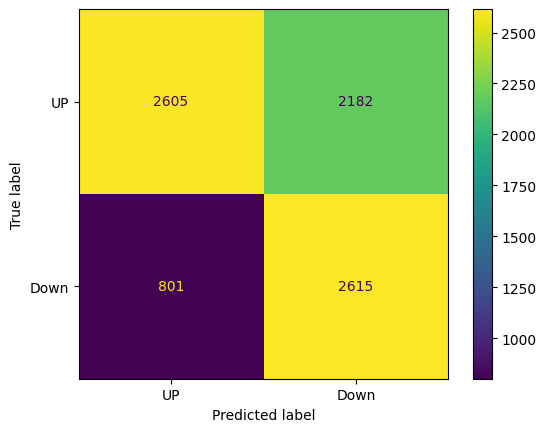

              precision    recall  f1-score   support

          UP       0.76      0.54      0.64      4787
        Down       0.55      0.77      0.64      3416

    accuracy                           0.64      8203
   macro avg       0.65      0.65      0.64      8203
weighted avg       0.67      0.64      0.64      8203



In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics

def convert(x):
    if x.decode() == 'UP':
        return 1
    else:
        return 0
start = 0
end = len(predictions)
yy_true = list(map(convert,df['class'].values.tolist()))[start:end]
y_pred = predictions[start:end]
#print(df['class'].values.tolist()[start:end])
#print(y_true)
#print(y_pred)
confusion_matrix = confusion_matrix(yy_true, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['UP', 'Down'])

cm_display.plot()
plt.show()
print(metrics.classification_report(yy_true, y_pred, target_names = ['UP', 'Down']))